In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.cluster import KMeans

In [3]:
import os
import scipy.io

In [4]:
path_data = "./data/1823_PDX_3_1_HTO/67c7c4db-b739-44d9-94f1-7d4c7ccb0b2b/"

# Load Class

In [5]:
df_class = pd.read_csv(
    os.path.join(path_data, "final-classification.tsv.gz"),
    sep="\t",
    compression="gzip",
    index_col=0
)

In [6]:
df_class

,hashID
121270372362139,Doublet
121270372580596,M0016
121270373837613,Doublet
121270376191837,Doublet
121270376286454,Doublet
...,...
240626009230061,Doublet
240626009269997,Doublet
240626009328540,Doublet
240626009500915,Doublet


# Convert Numeric Barcode to ACGR

In [7]:
from dna3bit import DNA3Bit

In [8]:
dna3bit = DNA3Bit()

In [9]:
new_index = df_class.index.map(lambda x: dna3bit.decode(x).decode())

In [10]:
df_class.index = new_index

In [11]:
df_class

,hashID
TTAAGGCGTGCCTCTT,Doublet
TTAAGGCGTCGTCTCA,M0016
TTAAGGCGATTCGAGG,Doublet
TTAAGGCGGATGTGTG,Doublet
TTAAGGCGGACAATCC,Doublet
...,...
CCGGAATTCTTAGTGG,Doublet
CCGGAATTCTACTTGG,Doublet
CCGGAATTCTCAGCTA,Doublet
CCGGAATTCATCCTCT,Doublet


# Load UMI

In [12]:
mtx = scipy.io.mmread(
    os.path.join(path_data, "umis/matrix.mtx.gz")
)

In [13]:
barcodes = pd.read_csv(
    os.path.join(path_data, "umis/barcodes.tsv.gz"),
    sep="\t", 
    compression="gzip",
    header=None
)

In [14]:
features = pd.read_csv(
    os.path.join(path_data, "umis/features.tsv.gz"),
    sep="\t",
    compression="gzip",
    header=None
)

In [15]:
df_umis = pd.DataFrame(
    mtx.T.todense(),
    index=barcodes[0],
    columns=features[0]
)

In [16]:
df_umis

,M0001-AGCAGTTA,M0002-CTTGTACC,M0003-GAACCCGG,M0004-TCGTAGAT,M0005-ACGCGGAA,M0006-CGCTATCC,M0007-GTTGCATG,M0011-TCACGGTA,M0012-CACTCAAC,M0013-GCTGTGTA,M0014-TTGCGTCG,M0015-ATATGAGA,M0016-CACCTCAG,M0017-GCTACTTC,M0018-TGGGAGCT,M0019-ATCCGGCA,M0020-CCGTTATG,unmapped
0,,,,,,,,,,,,,,,,,,
GACAATCCCAAGGTCT,74,243,101,610,118,191,787,73,127,401,523,72,1054,173,341,131,216,139
TTAAGGCGGGTGATTC,19,68,28,142,36,97,122,20,51,153,188,28,515,53,138,37,71,49
CTTCACCAGCTATCCT,30,91,58,203,48,81,252,32,58,261,286,27,202,53,225,52,106,44
ACGACAGAAGATTGCC,31,65,26,200,50,96,202,22,54,201,368,22,234,48,150,68,94,42
CGCAATCTGTCCACAT,54,191,87,343,84,143,372,40,83,473,391,47,319,116,288,87,197,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTTCCGTACGATAGAG,24,87,66,202,44,115,251,24,60,192,348,24,1003,80,168,67,106,60
CTAAGTGGATGCCAAC,53,181,66,302,100,155,319,65,106,453,421,31,553,90,313,104,154,54
ACCAGCTTTTGGACGT,57,105,45,268,68,106,276,29,62,264,329,25,301,70,231,63,162,52


In [167]:
df_umis.iloc[:,:-1].apply(lambda x: np.median(x))

0
M0001-AGCAGTTA     29.0
M0002-CTTGTACC     92.0
M0003-GAACCCGG     42.0
M0004-TCGTAGAT    220.0
M0005-ACGCGGAA     51.0
M0006-CGCTATCC    101.0
M0007-GTTGCATG    242.0
M0011-TCACGGTA     31.0
M0012-CACTCAAC     57.0
M0013-GCTGTGTA    222.0
M0014-TTGCGTCG    311.0
M0015-ATATGAGA     29.0
M0016-CACCTCAG    242.0
M0017-GCTACTTC     63.0
M0018-TGGGAGCT    183.0
M0019-ATCCGGCA     60.0
dtype: float64

# Merge

In [17]:
df_umi_class = pd.merge(
    df_umis, df_class,
    left_index=True, right_index=True,
    how="inner"
)

In [18]:
df_umi_class

,M0001-AGCAGTTA,M0002-CTTGTACC,M0003-GAACCCGG,M0004-TCGTAGAT,M0005-ACGCGGAA,M0006-CGCTATCC,M0007-GTTGCATG,M0011-TCACGGTA,M0012-CACTCAAC,M0013-GCTGTGTA,M0014-TTGCGTCG,M0015-ATATGAGA,M0016-CACCTCAG,M0017-GCTACTTC,M0018-TGGGAGCT,M0019-ATCCGGCA,M0020-CCGTTATG,unmapped,hashID
GACAATCCCAAGGTCT,74,243,101,610,118,191,787,73,127,401,523,72,1054,173,341,131,216,139,Doublet
TTAAGGCGGGTGATTC,19,68,28,142,36,97,122,20,51,153,188,28,515,53,138,37,71,49,Doublet
CTTCACCAGCTATCCT,30,91,58,203,48,81,252,32,58,261,286,27,202,53,225,52,106,44,Doublet
ACGACAGAAGATTGCC,31,65,26,200,50,96,202,22,54,201,368,22,234,48,150,68,94,42,Doublet
CGCAATCTGTCCACAT,54,191,87,343,84,143,372,40,83,473,391,47,319,116,288,87,197,91,Doublet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTTCCGTACGATAGAG,24,87,66,202,44,115,251,24,60,192,348,24,1003,80,168,67,106,60,Doublet
CTAAGTGGATGCCAAC,53,181,66,302,100,155,319,65,106,453,421,31,553,90,313,104,154,54,Doublet
ACCAGCTTTTGGACGT,57,105,45,268,68,106,276,29,62,264,329,25,301,70,231,63,162,52,Doublet
GAATGCGAGCACTCAT,27,74,24,148,1180,77,970,35,43,161,316,33,221,56,127,57,90,185,Doublet


In [19]:
df_umi_class[ df_umi_class.hashID == "M0020" ]

,M0001-AGCAGTTA,M0002-CTTGTACC,M0003-GAACCCGG,M0004-TCGTAGAT,M0005-ACGCGGAA,M0006-CGCTATCC,M0007-GTTGCATG,M0011-TCACGGTA,M0012-CACTCAAC,M0013-GCTGTGTA,M0014-TTGCGTCG,M0015-ATATGAGA,M0016-CACCTCAG,M0017-GCTACTTC,M0018-TGGGAGCT,M0019-ATCCGGCA,M0020-CCGTTATG,unmapped,hashID
TAGCGTCTGGAATTGC,9,27,17,92,12,53,98,7,19,87,134,8,110,16,51,19,865,31,M0020
TTAGGTCGAGACGCAA,17,58,26,115,22,74,124,15,45,92,176,20,171,29,87,30,1060,63,M0020
ACGTGATGGGATGTAG,33,140,52,223,66,122,391,39,78,242,269,46,243,80,283,74,1770,63,M0020
AAGTGTCGTCTTGTCG,21,67,34,144,41,95,165,26,39,198,310,22,161,55,148,44,1404,52,M0020
TGTGCGTTTCGCATTG,34,71,30,145,37,84,150,17,39,149,192,23,211,37,129,57,1837,42,M0020
GTAGAGCAACACACTC,17,74,41,162,39,109,175,24,47,164,227,24,203,43,158,46,1299,58,M0020
TGTGGTACGAAGTTGG,21,80,42,170,44,112,168,29,52,174,315,21,175,70,144,59,4318,65,M0020
GAGCTTGTCAATGTGG,30,94,33,172,51,96,159,21,43,185,238,31,179,51,133,40,2012,45,M0020
TGACCATCCCATTGGA,26,81,38,247,64,112,251,41,47,199,296,26,294,69,183,65,1631,60,M0020
CATTGCCTCCTATACC,17,60,50,128,28,96,123,32,50,116,172,22,206,42,104,41,1355,34,M0020


# Rerun KMeans

In [20]:
df_umis.drop(columns="unmapped", inplace=True)

In [21]:
df_umis

,M0001-AGCAGTTA,M0002-CTTGTACC,M0003-GAACCCGG,M0004-TCGTAGAT,M0005-ACGCGGAA,M0006-CGCTATCC,M0007-GTTGCATG,M0011-TCACGGTA,M0012-CACTCAAC,M0013-GCTGTGTA,M0014-TTGCGTCG,M0015-ATATGAGA,M0016-CACCTCAG,M0017-GCTACTTC,M0018-TGGGAGCT,M0019-ATCCGGCA,M0020-CCGTTATG
0,,,,,,,,,,,,,,,,,
GACAATCCCAAGGTCT,74,243,101,610,118,191,787,73,127,401,523,72,1054,173,341,131,216
TTAAGGCGGGTGATTC,19,68,28,142,36,97,122,20,51,153,188,28,515,53,138,37,71
CTTCACCAGCTATCCT,30,91,58,203,48,81,252,32,58,261,286,27,202,53,225,52,106
ACGACAGAAGATTGCC,31,65,26,200,50,96,202,22,54,201,368,22,234,48,150,68,94
CGCAATCTGTCCACAT,54,191,87,343,84,143,372,40,83,473,391,47,319,116,288,87,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTTCCGTACGATAGAG,24,87,66,202,44,115,251,24,60,192,348,24,1003,80,168,67,106
CTAAGTGGATGCCAAC,53,181,66,302,100,155,319,65,106,453,421,31,553,90,313,104,154
ACCAGCTTTTGGACGT,57,105,45,268,68,106,276,29,62,264,329,25,301,70,231,63,162


In [22]:
df_clr = df_umis.apply(lambda row: np.log1p((row + 1) / scipy.stats.mstats.gmean(row + 1)), axis=1)
df_clr.sample(10)

,M0001-AGCAGTTA,M0002-CTTGTACC,M0003-GAACCCGG,M0004-TCGTAGAT,M0005-ACGCGGAA,M0006-CGCTATCC,M0007-GTTGCATG,M0011-TCACGGTA,M0012-CACTCAAC,M0013-GCTGTGTA,M0014-TTGCGTCG,M0015-ATATGAGA,M0016-CACCTCAG,M0017-GCTACTTC,M0018-TGGGAGCT,M0019-ATCCGGCA,M0020-CCGTTATG
0,,,,,,,,,,,,,,,,,
CTTCGTTCCTTCGACT,0.289735,0.802246,0.456842,1.442550,0.406481,0.671165,1.492595,0.316463,0.443658,1.023807,1.271022,0.289735,1.437650,0.463369,1.023807,0.489060,0.764453
GAAGTACCTCCGTATG,0.277135,0.638777,0.422089,1.115436,0.485197,0.700522,1.533297,0.339683,0.472005,1.087127,1.244038,0.364633,1.233759,0.458637,0.994425,0.608347,0.850683
CAGTCTTCCAGTCCAA,0.220081,0.712081,0.378605,1.487290,0.469622,0.732869,1.244870,0.253860,0.515403,1.238687,1.369334,0.341267,1.226203,0.508990,1.184521,0.462908,0.821410
TTCCGCTTTTCGCAGT,0.234899,0.684849,0.283542,1.215038,0.408358,0.870016,1.165183,0.311631,0.496548,1.180790,1.538265,0.302355,1.447631,0.605501,1.266086,0.504193,0.709959
ACCACGATCACACATG,0.358195,0.738803,0.365885,1.162494,0.396066,0.769967,1.169378,0.302643,0.501768,1.186383,1.760526,0.252440,1.199781,0.488303,1.064604,0.547515,0.785193
GCACAACTGGCATACT,0.216986,0.788500,0.379514,1.138872,0.455504,0.712235,1.240657,0.262382,0.592086,1.323863,1.621734,0.244470,1.383465,0.553034,1.029670,0.477219,0.834625
ACATCCTGACCAGCTT,0.289714,0.697206,0.457704,1.100639,0.483150,0.612589,1.313430,0.304842,0.444734,1.166193,1.613899,0.226800,1.163015,0.798399,1.150203,0.438185,0.802971
ACACACTCCGACGTTA,0.297962,0.688088,0.326190,1.254734,0.414912,0.726119,1.276491,0.259041,0.423366,1.381929,1.585656,0.353642,1.251062,0.504195,1.178590,0.480625,0.798099
CTTCGTTCGCTTCGAA,0.344716,0.784559,0.305595,1.155964,0.513745,0.728657,1.339237,0.344716,0.467325,1.283801,1.413076,0.273157,1.131811,0.507244,1.005401,0.588628,0.728657


In [23]:
def kemans_per_row(row):
    x = np.array(row).reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
    y_predict = kmeans.predict(x)
    return y_predict

In [24]:
%%time
df_kmeans = df_clr.apply(lambda row: kemans_per_row(row) , axis=1)

CPU times: user 2min 29s, sys: 693 ms, total: 2min 29s
Wall time: 2min 29s


In [25]:
df_kmeans

0
GACAATCCCAAGGTCT    [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, ...
TTAAGGCGGGTGATTC    [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, ...
CTTCACCAGCTATCCT    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
ACGACAGAAGATTGCC    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
CGCAATCTGTCCACAT    [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
                                          ...                        
CTTCCGTACGATAGAG    [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, ...
CTAAGTGGATGCCAAC    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
ACCAGCTTTTGGACGT    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
GAATGCGAGCACTCAT    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
GAAGTACCCTGAGATC    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
Length: 13255, dtype: object

In [26]:
df_umis.head(10).apply(lambda row: kemans_per_row(row) , axis=1)

0
GACAATCCCAAGGTCT    [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, ...
TTAAGGCGGGTGATTC    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...
CTTCACCAGCTATCCT    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
ACGACAGAAGATTGCC    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
CGCAATCTGTCCACAT    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
ACCACGATCAACACCT    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
GACTATGCGTGTTCCT    [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, ...
TCTGCTCTCCTTCCTT    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
CATTGCCTAACTTGCC    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
TAGGACCTCGACCATT    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, ...
dtype: object

In [27]:
df_umi_class[ df_umi_class.hashID == "M0001" ].iloc[:,0:-2]

,M0001-AGCAGTTA,M0002-CTTGTACC,M0003-GAACCCGG,M0004-TCGTAGAT,M0005-ACGCGGAA,M0006-CGCTATCC,M0007-GTTGCATG,M0011-TCACGGTA,M0012-CACTCAAC,M0013-GCTGTGTA,M0014-TTGCGTCG,M0015-ATATGAGA,M0016-CACCTCAG,M0017-GCTACTTC,M0018-TGGGAGCT,M0019-ATCCGGCA,M0020-CCGTTATG
GTTAGACGTCCGAGTT,853,54,33,122,27,49,144,21,49,108,198,16,139,37,105,38,60
CGATAGAGTTGCTTGC,788,52,25,121,26,47,109,18,26,130,167,18,160,56,84,27,74
TAGGTAGGTAGACGTG,1318,81,36,173,40,72,152,22,54,159,241,23,190,52,168,59,94
TAGGACCTTGAAGACG,350,3,0,10,5,6,7,1,1,17,22,0,17,5,6,2,3
TCGCATTGTGAAGACG,341,6,2,21,7,6,18,1,9,19,19,0,21,2,16,5,7
CTCGATACGCGAATCT,1046,100,38,191,54,85,204,23,65,214,253,34,188,53,157,67,112


In [28]:
df_umi_class.iloc[:,0:-2]

,M0001-AGCAGTTA,M0002-CTTGTACC,M0003-GAACCCGG,M0004-TCGTAGAT,M0005-ACGCGGAA,M0006-CGCTATCC,M0007-GTTGCATG,M0011-TCACGGTA,M0012-CACTCAAC,M0013-GCTGTGTA,M0014-TTGCGTCG,M0015-ATATGAGA,M0016-CACCTCAG,M0017-GCTACTTC,M0018-TGGGAGCT,M0019-ATCCGGCA,M0020-CCGTTATG
GACAATCCCAAGGTCT,74,243,101,610,118,191,787,73,127,401,523,72,1054,173,341,131,216
TTAAGGCGGGTGATTC,19,68,28,142,36,97,122,20,51,153,188,28,515,53,138,37,71
CTTCACCAGCTATCCT,30,91,58,203,48,81,252,32,58,261,286,27,202,53,225,52,106
ACGACAGAAGATTGCC,31,65,26,200,50,96,202,22,54,201,368,22,234,48,150,68,94
CGCAATCTGTCCACAT,54,191,87,343,84,143,372,40,83,473,391,47,319,116,288,87,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTTCCGTACGATAGAG,24,87,66,202,44,115,251,24,60,192,348,24,1003,80,168,67,106
CTAAGTGGATGCCAAC,53,181,66,302,100,155,319,65,106,453,421,31,553,90,313,104,154
ACCAGCTTTTGGACGT,57,105,45,268,68,106,276,29,62,264,329,25,301,70,231,63,162
GAATGCGAGCACTCAT,27,74,24,148,1180,77,970,35,43,161,316,33,221,56,127,57,90


In [29]:
df_umis.head(1).apply(lambda row: np.log(row), axis=1)

,M0001-AGCAGTTA,M0002-CTTGTACC,M0003-GAACCCGG,M0004-TCGTAGAT,M0005-ACGCGGAA,M0006-CGCTATCC,M0007-GTTGCATG,M0011-TCACGGTA,M0012-CACTCAAC,M0013-GCTGTGTA,M0014-TTGCGTCG,M0015-ATATGAGA,M0016-CACCTCAG,M0017-GCTACTTC,M0018-TGGGAGCT,M0019-ATCCGGCA,M0020-CCGTTATG
0,,,,,,,,,,,,,,,,,
GACAATCCCAAGGTCT,4.304065,5.493061,4.615121,6.413459,4.770685,5.252273,6.668228,4.290459,4.844187,5.993961,6.259581,4.276666,6.960348,5.153292,5.831882,4.875197,5.375278


In [30]:
np.log(74)

4.30406509320417

In [31]:
df_umis.head(1).apply(lambda row: row + 1, axis=1)

,M0001-AGCAGTTA,M0002-CTTGTACC,M0003-GAACCCGG,M0004-TCGTAGAT,M0005-ACGCGGAA,M0006-CGCTATCC,M0007-GTTGCATG,M0011-TCACGGTA,M0012-CACTCAAC,M0013-GCTGTGTA,M0014-TTGCGTCG,M0015-ATATGAGA,M0016-CACCTCAG,M0017-GCTACTTC,M0018-TGGGAGCT,M0019-ATCCGGCA,M0020-CCGTTATG
0,,,,,,,,,,,,,,,,,
GACAATCCCAAGGTCT,75,244,102,611,119,192,788,74,128,402,524,73,1055,174,342,132,217


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df_umis.head(1).values

array([[  74,  243,  101,  610,  118,  191,  787,   73,  127,  401,  523,
          72, 1054,  173,  341,  131,  216]])

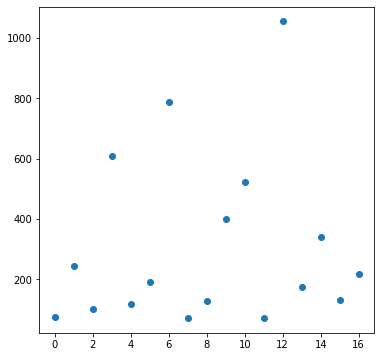

In [34]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(
    x=range(len(df_umis.columns)),
    y=df_umis.head(1).iloc[0]
)

plt.show()

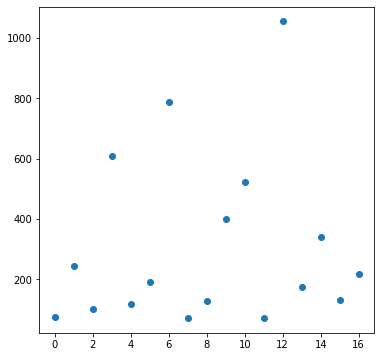

In [35]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(
    x=range(len(df_umis.columns)),
    y=df_umis.head(1).iloc[0]
)

plt.show()

In [36]:
df_umi_class[ df_umi_class.hashID == "Doublet" ]

,M0001-AGCAGTTA,M0002-CTTGTACC,M0003-GAACCCGG,M0004-TCGTAGAT,M0005-ACGCGGAA,M0006-CGCTATCC,M0007-GTTGCATG,M0011-TCACGGTA,M0012-CACTCAAC,M0013-GCTGTGTA,M0014-TTGCGTCG,M0015-ATATGAGA,M0016-CACCTCAG,M0017-GCTACTTC,M0018-TGGGAGCT,M0019-ATCCGGCA,M0020-CCGTTATG,unmapped,hashID
GACAATCCCAAGGTCT,74,243,101,610,118,191,787,73,127,401,523,72,1054,173,341,131,216,139,Doublet
TTAAGGCGGGTGATTC,19,68,28,142,36,97,122,20,51,153,188,28,515,53,138,37,71,49,Doublet
CTTCACCAGCTATCCT,30,91,58,203,48,81,252,32,58,261,286,27,202,53,225,52,106,44,Doublet
ACGACAGAAGATTGCC,31,65,26,200,50,96,202,22,54,201,368,22,234,48,150,68,94,42,Doublet
CGCAATCTGTCCACAT,54,191,87,343,84,143,372,40,83,473,391,47,319,116,288,87,197,91,Doublet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTTCCGTACGATAGAG,24,87,66,202,44,115,251,24,60,192,348,24,1003,80,168,67,106,60,Doublet
CTAAGTGGATGCCAAC,53,181,66,302,100,155,319,65,106,453,421,31,553,90,313,104,154,54,Doublet
ACCAGCTTTTGGACGT,57,105,45,268,68,106,276,29,62,264,329,25,301,70,231,63,162,52,Doublet
GAATGCGAGCACTCAT,27,74,24,148,1180,77,970,35,43,161,316,33,221,56,127,57,90,185,Doublet


In [37]:
df_umis.loc["CTTCCGTACGATAGAG"]

0
M0001-AGCAGTTA      24
M0002-CTTGTACC      87
M0003-GAACCCGG      66
M0004-TCGTAGAT     202
M0005-ACGCGGAA      44
M0006-CGCTATCC     115
M0007-GTTGCATG     251
M0011-TCACGGTA      24
M0012-CACTCAAC      60
M0013-GCTGTGTA     192
M0014-TTGCGTCG     348
M0015-ATATGAGA      24
M0016-CACCTCAG    1003
M0017-GCTACTTC      80
M0018-TGGGAGCT     168
M0019-ATCCGGCA      67
M0020-CCGTTATG     106
Name: CTTCCGTACGATAGAG, dtype: int64

In [38]:
df_clr.loc["CTTCCGTACGATAGAG"]

0
M0001-AGCAGTTA    0.223017
M0002-CTTGTACC    0.630977
M0003-GAACCCGG    0.512571
M0004-TCGTAGAT    1.108140
M0005-ACGCGGAA    0.371368
M0006-CGCTATCC    0.769770
M0007-GTTGCATG    1.258010
M0011-TCACGGTA    0.223017
M0012-CACTCAAC    0.475995
M0013-GCTGTGTA    1.074587
M0014-TTGCGTCG    1.501363
M0015-ATATGAGA    0.223017
M0016-CACCTCAG    2.400952
M0017-GCTACTTC    0.593045
M0018-TGGGAGCT    0.989145
M0019-ATCCGGCA    0.518539
M0020-CCGTTATG    0.727223
Name: CTTCCGTACGATAGAG, dtype: float64

In [39]:
kemans_per_row(df_umis.loc["CTTCCGTACGATAGAG"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [40]:
kemans_per_row(df_clr.loc["CTTCCGTACGATAGAG"])

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

In [41]:
def run_kmeans_test(cb):
    print(df_umi_class.loc[cb])
    print(kemans_per_row(df_umis.loc[cb]))
    print(kemans_per_row(df_clr.loc[cb]))
    
    fig, ax = plt.subplots(figsize=(6,6))

    ax.scatter(
        x=range(len(df_umis.columns)),
        y=df_umis.loc[cb]
    )

    plt.show()

In [42]:
cb = "GAATGCGAGCACTCAT"

M0001-AGCAGTTA         27
M0002-CTTGTACC         74
M0003-GAACCCGG         24
M0004-TCGTAGAT        148
M0005-ACGCGGAA       1180
M0006-CGCTATCC         77
M0007-GTTGCATG        970
M0011-TCACGGTA         35
M0012-CACTCAAC         43
M0013-GCTGTGTA        161
M0014-TTGCGTCG        316
M0015-ATATGAGA         33
M0016-CACCTCAG        221
M0017-GCTACTTC         56
M0018-TGGGAGCT        127
M0019-ATCCGGCA         57
M0020-CCGTTATG         90
unmapped              185
hashID            Doublet
Name: GAATGCGAGCACTCAT, dtype: object
[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]


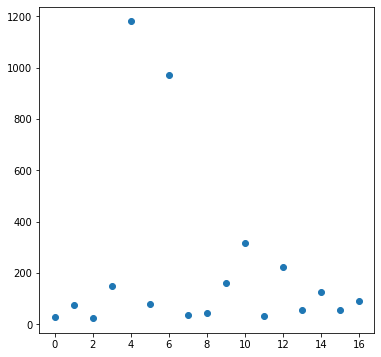

In [43]:
run_kmeans_test(cb)

# Other Clustering Algos

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
X = df_umis.loc[cb].values.reshape(-1,1)

In [46]:
# X = df_clr.loc[cb].values.reshape(-1,1)

## DBSCAN

In [47]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

In [48]:
clustering.labels_

array([ 0,  1,  0, -1, -1,  1, -1,  2, -1, -1, -1,  2, -1,  3, -1,  3, -1])

## Spectral Clustering

In [49]:
from sklearn.cluster import SpectralClustering

In [50]:
clustering = SpectralClustering(
    n_clusters=2,
#     assign_labels="discretize",
    random_state=0
).fit(X)

/opt/miniconda3/envs/dev/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [51]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

## Agglomerative Clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
clustering = AgglomerativeClustering(n_clusters=2).fit(X)

In [54]:
clustering.labels_

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Visualization

In [55]:
df_umi_class[ df_umi_class.hashID == "Doublet" ]

,M0001-AGCAGTTA,M0002-CTTGTACC,M0003-GAACCCGG,M0004-TCGTAGAT,M0005-ACGCGGAA,M0006-CGCTATCC,M0007-GTTGCATG,M0011-TCACGGTA,M0012-CACTCAAC,M0013-GCTGTGTA,M0014-TTGCGTCG,M0015-ATATGAGA,M0016-CACCTCAG,M0017-GCTACTTC,M0018-TGGGAGCT,M0019-ATCCGGCA,M0020-CCGTTATG,unmapped,hashID
GACAATCCCAAGGTCT,74,243,101,610,118,191,787,73,127,401,523,72,1054,173,341,131,216,139,Doublet
TTAAGGCGGGTGATTC,19,68,28,142,36,97,122,20,51,153,188,28,515,53,138,37,71,49,Doublet
CTTCACCAGCTATCCT,30,91,58,203,48,81,252,32,58,261,286,27,202,53,225,52,106,44,Doublet
ACGACAGAAGATTGCC,31,65,26,200,50,96,202,22,54,201,368,22,234,48,150,68,94,42,Doublet
CGCAATCTGTCCACAT,54,191,87,343,84,143,372,40,83,473,391,47,319,116,288,87,197,91,Doublet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTTCCGTACGATAGAG,24,87,66,202,44,115,251,24,60,192,348,24,1003,80,168,67,106,60,Doublet
CTAAGTGGATGCCAAC,53,181,66,302,100,155,319,65,106,453,421,31,553,90,313,104,154,54,Doublet
ACCAGCTTTTGGACGT,57,105,45,268,68,106,276,29,62,264,329,25,301,70,231,63,162,52,Doublet
GAATGCGAGCACTCAT,27,74,24,148,1180,77,970,35,43,161,316,33,221,56,127,57,90,185,Doublet


In [56]:
df_doublets = df_umi_class[ df_umi_class.hashID == "Doublet" ].iloc[:, 0:-2]

In [57]:
# umi sorted by descending
sorted_doublets = df_doublets.apply(lambda row: sorted(row, reverse=True), axis=1)
sorted_doublets

GACAATCCCAAGGTCT    [1054, 787, 610, 523, 401, 341, 243, 216, 191,...
TTAAGGCGGGTGATTC    [515, 188, 153, 142, 138, 122, 97, 71, 68, 53,...
CTTCACCAGCTATCCT    [286, 261, 252, 225, 203, 202, 106, 91, 81, 58...
ACGACAGAAGATTGCC    [368, 234, 202, 201, 200, 150, 96, 94, 68, 65,...
CGCAATCTGTCCACAT    [473, 391, 372, 343, 319, 288, 197, 191, 143, ...
                                          ...                        
CTTCCGTACGATAGAG    [1003, 348, 251, 202, 192, 168, 115, 106, 87, ...
CTAAGTGGATGCCAAC    [553, 453, 421, 319, 313, 302, 181, 155, 154, ...
ACCAGCTTTTGGACGT    [329, 301, 276, 268, 264, 231, 162, 106, 105, ...
GAATGCGAGCACTCAT    [1180, 970, 316, 221, 161, 148, 127, 90, 77, 7...
GAAGTACCCTGAGATC    [392, 222, 222, 205, 181, 180, 124, 103, 78, 6...
Length: 12666, dtype: object

In [58]:
sorted_doublets[1]

[515, 188, 153, 142, 138, 122, 97, 71, 68, 53, 51, 37, 36, 28, 28, 20, 19]

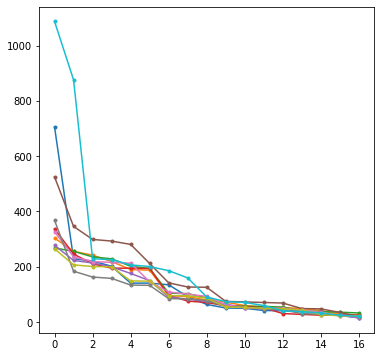

In [59]:
fig, ax = plt.subplots(figsize=(6,6))

for umis in sorted_doublets.sample(10):
    ax.plot(
        range(len(df_umis.columns)),
        umis,
        marker="o", markersize=3
    )

plt.show()

In [60]:
len(df_umis.columns)

17

## Initial

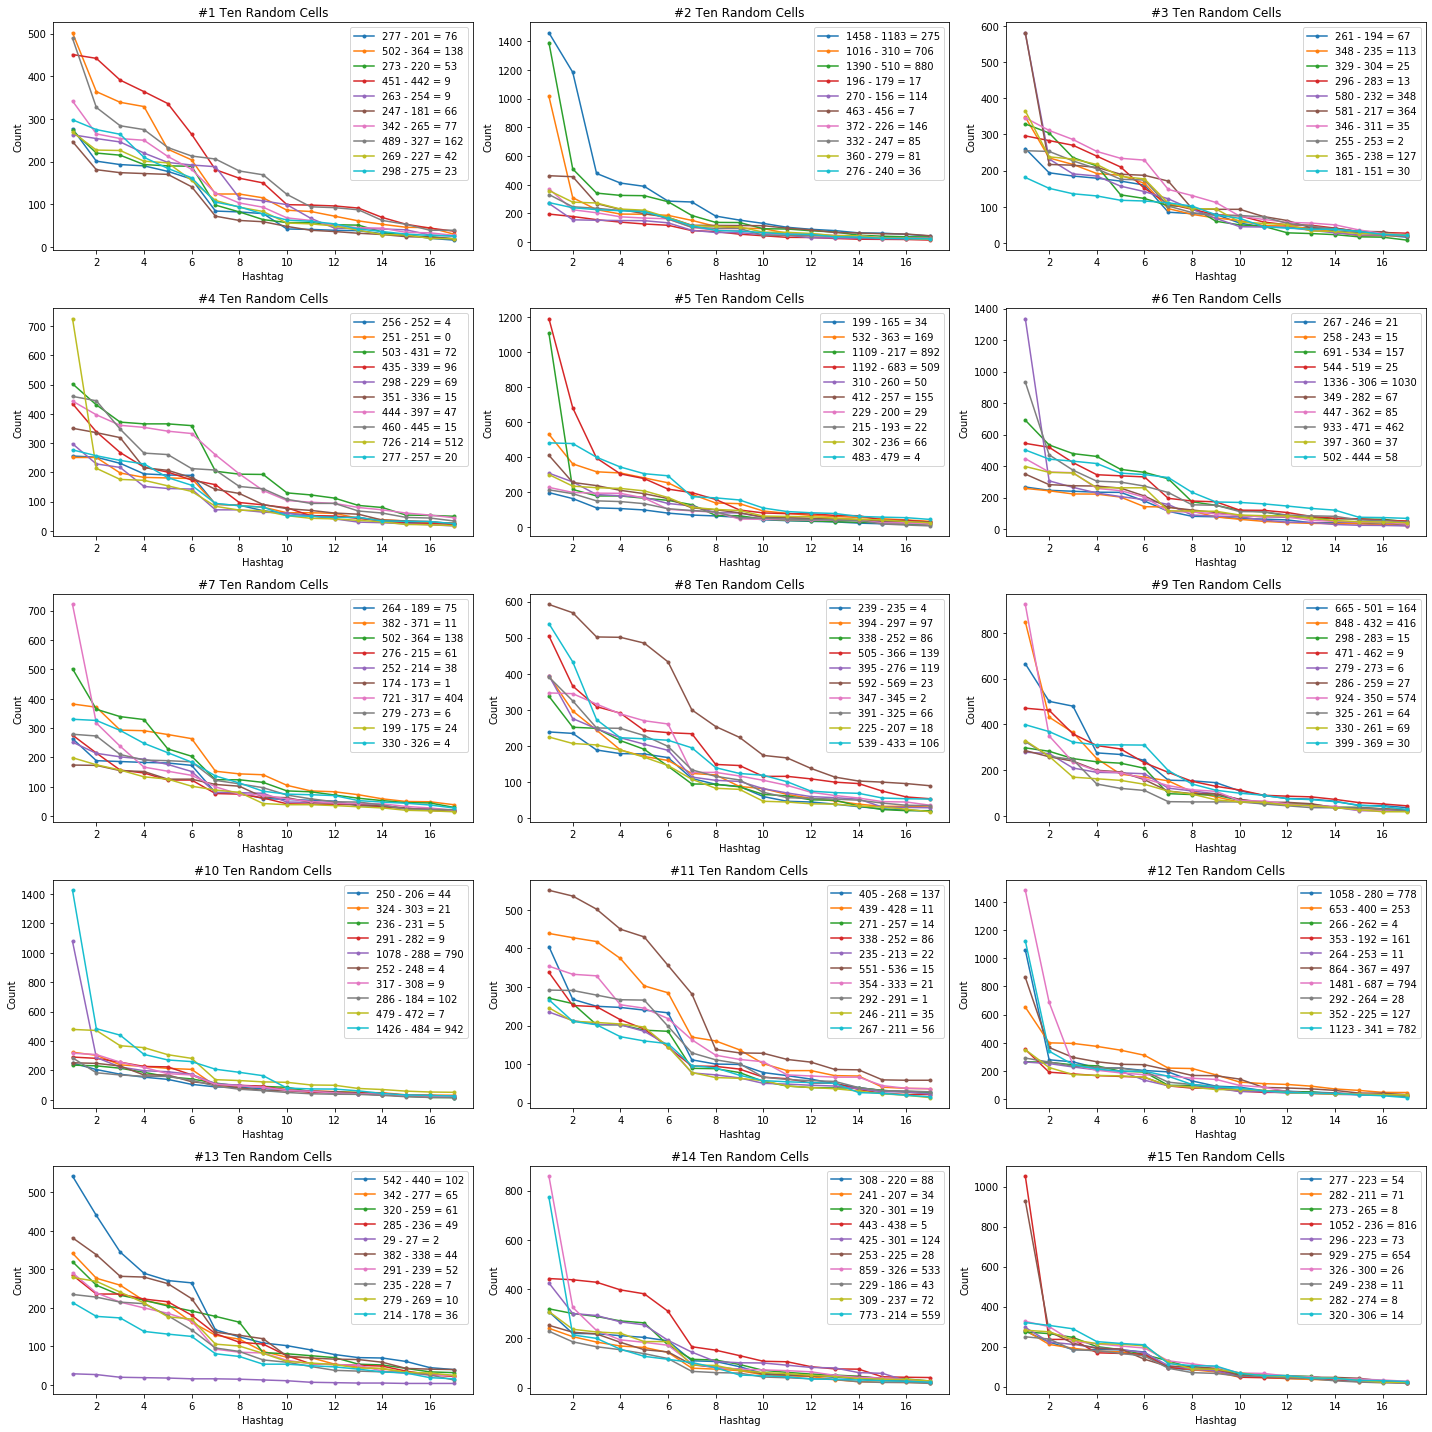

In [61]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

axes = axes.flat
for k in range(15):
    for umis in sorted_doublets.sample(10, random_state=k * 150):
        axes[k].plot(
            range(1, len(df_umis.columns) + 1),
            umis,
            marker="o", markersize=3,
            label=f"{umis[0]} - {umis[1]} = {umis[0] - umis[1]}"
        )
        axes[k].set_xlabel("Hashtag")
        axes[k].set_ylabel("Count")
        axes[k].set_title(f"#{k+1} Ten Random Cells")
        axes[k].legend()

plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


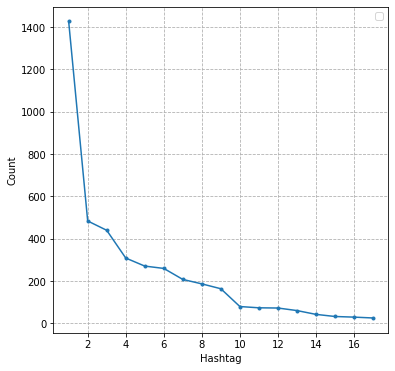

In [62]:
fig, ax = plt.subplots(figsize=(6,6))

umis = sorted_doublets.sample(10, random_state=9*150)
ax.plot(
    range(1, len(df_umis.columns) + 1),
    umis[9],
    marker="o", markersize=3,
)
ax.set_xlabel("Hashtag")
ax.set_ylabel("Count")
ax.legend()
ax.grid(b=True, linestyle="--")
plt.show()

In [63]:
umis[9]

[1426, 484, 440, 309, 271, 260, 208, 187, 164, 80, 74, 73, 61, 43, 33, 30, 26]

In [64]:
for cb, lst in sorted_doublets.to_frame().iterrows():
    if lst.values[0][0] == 1426 and lst.values[0][1] == 484:
        print(cb)
        display(df_doublets.loc[cb])
#         break

TGATGTCCATCCGGTA


M0001-AGCAGTTA      33
M0002-CTTGTACC     187
M0003-GAACCCGG      43
M0004-TCGTAGAT     440
M0005-ACGCGGAA      73
M0006-CGCTATCC    1426
M0007-GTTGCATG     271
M0011-TCACGGTA      26
M0012-CACTCAAC      74
M0013-GCTGTGTA     260
M0014-TTGCGTCG     484
M0015-ATATGAGA      30
M0016-CACCTCAG     309
M0017-GCTACTTC      80
M0018-TGGGAGCT     208
M0019-ATCCGGCA      61
M0020-CCGTTATG     164
Name: TGATGTCCATCCGGTA, dtype: int64

In [65]:
sorted_doublets.loc["TGATGTCCATCCGGTA"]

[1426, 484, 440, 309, 271, 260, 208, 187, 164, 80, 74, 73, 61, 43, 33, 30, 26]

In [66]:
for cb, lst in sorted_doublets.to_frame().iterrows():
    if lst.values[0][0] == 542 and lst.values[0][1] == 440:
        print(cb)
        display(df_doublets.loc[cb])
#         break

AACTTGCCCAACAGGT


M0001-AGCAGTTA     45
M0002-CTTGTACC    102
M0003-GAACCCGG     61
M0004-TCGTAGAT    265
M0005-ACGCGGAA     91
M0006-CGCTATCC    143
M0007-GTTGCATG    440
M0011-TCACGGTA     40
M0012-CACTCAAC     71
M0013-GCTGTGTA    290
M0014-TTGCGTCG    542
M0015-ATATGAGA     79
M0016-CACCTCAG    271
M0017-GCTACTTC    109
M0018-TGGGAGCT    345
M0019-ATCCGGCA     70
M0020-CCGTTATG    125
Name: AACTTGCCCAACAGGT, dtype: int64

In [67]:
sorted_doublets.loc["AACTTGCCCAACAGGT"]

[542, 440, 345, 290, 271, 265, 143, 125, 109, 102, 91, 79, 71, 70, 61, 45, 40]

In [68]:
for cb, lst in sorted_doublets.to_frame().iterrows():
    if lst.values[0][0] == 29 and lst.values[0][1] == 27:
        print(cb)
        display(df_doublets.loc[cb])
#         break

CAACAGGTCCATTCAC


M0001-AGCAGTTA     4
M0002-CTTGTACC    13
M0003-GAACCCGG     6
M0004-TCGTAGAT    18
M0005-ACGCGGAA     4
M0006-CGCTATCC    16
M0007-GTTGCATG    20
M0011-TCACGGTA     4
M0012-CACTCAAC    11
M0013-GCTGTGTA    29
M0014-TTGCGTCG    27
M0015-ATATGAGA     5
M0016-CACCTCAG    19
M0017-GCTACTTC     7
M0018-TGGGAGCT    16
M0019-ATCCGGCA     5
M0020-CCGTTATG    15
Name: CAACAGGTCCATTCAC, dtype: int64

In [69]:
sorted_doublets.loc["CAACAGGTCCATTCAC"]

[29, 27, 20, 19, 18, 16, 16, 15, 13, 11, 7, 6, 5, 5, 4, 4, 4]

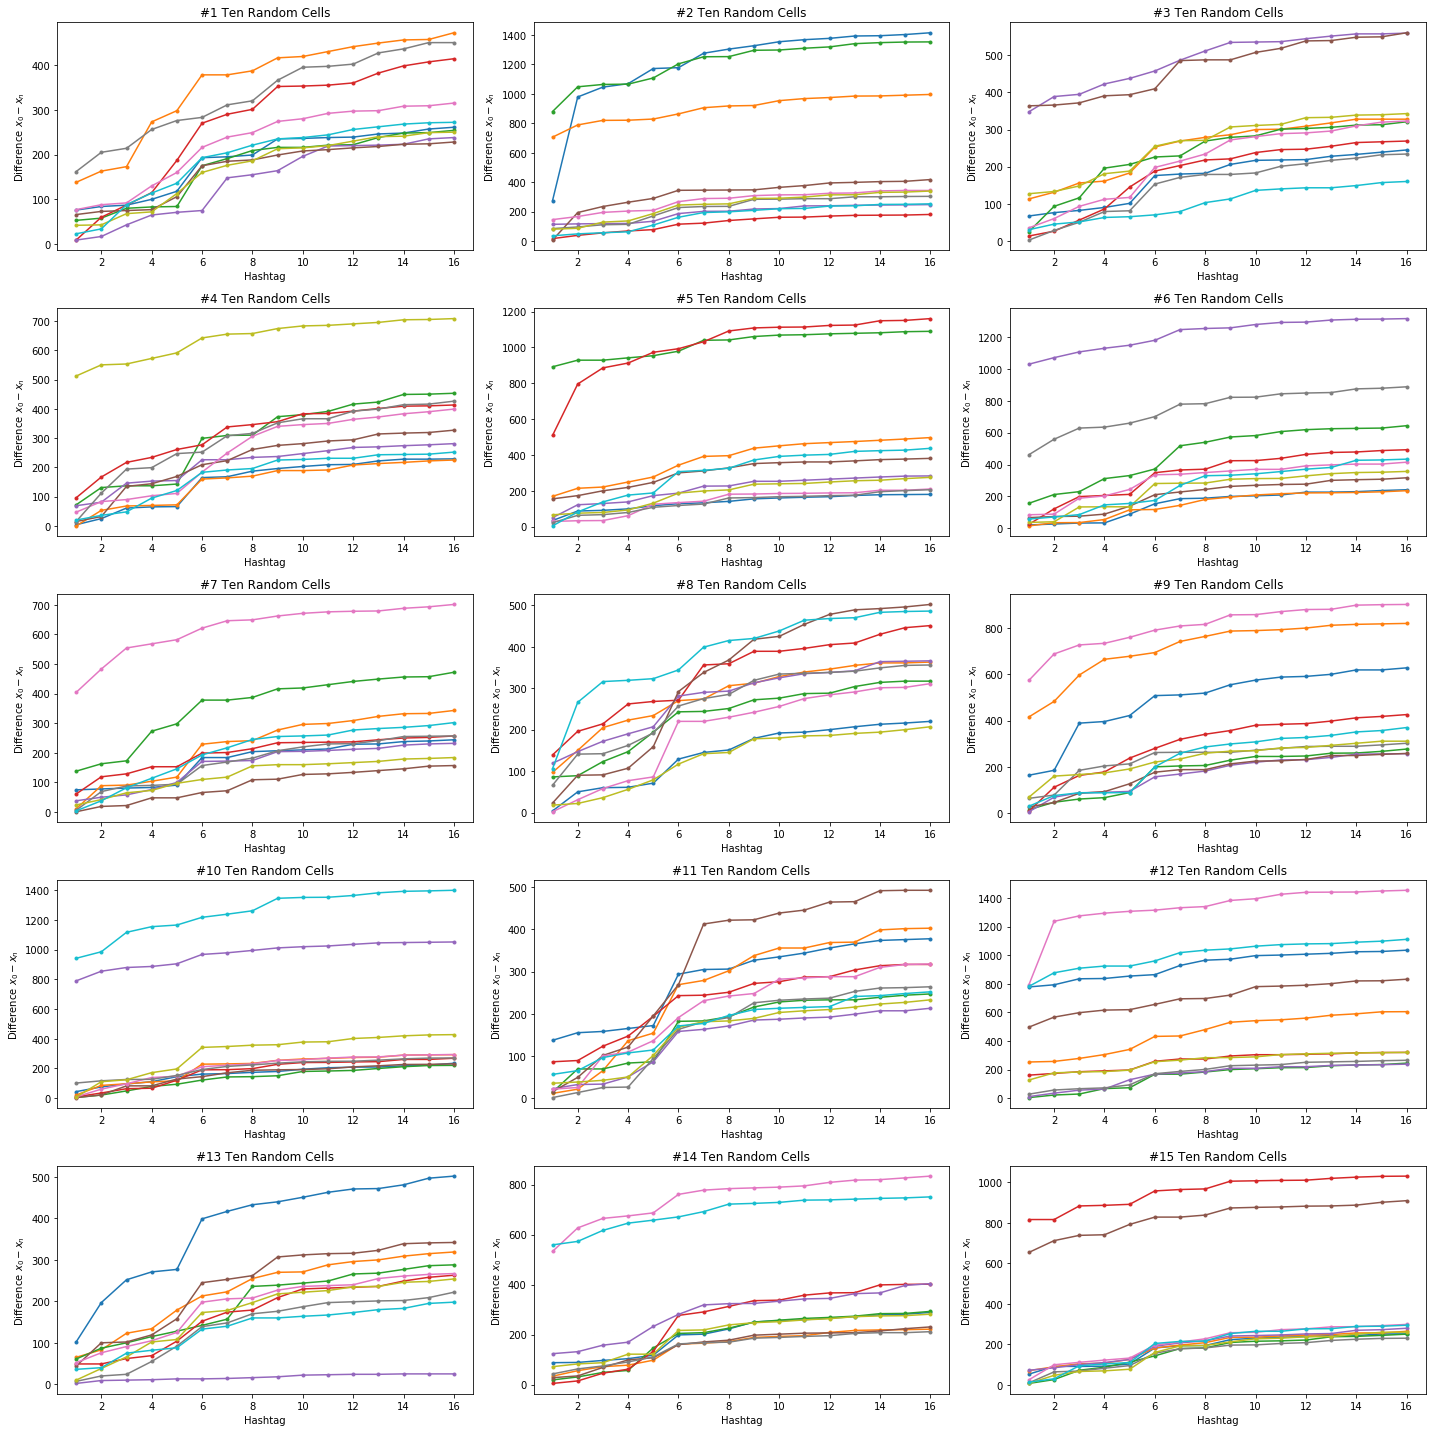

In [70]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

axes = axes.flat
for k in range(15):
    for umis in sorted_doublets.sample(10, random_state=k * 150):
        umis = [umis[0] - x for x in umis[1:]]
        axes[k].plot(
            range(1, len(df_umis.columns)),
            umis,
            marker="o", markersize=3
        )
        axes[k].set_xlabel("Hashtag")
        axes[k].set_ylabel(r"Difference $x_0 - x_n$")
        axes[k].set_title(f"#{k+1} Ten Random Cells")

plt.tight_layout()
plt.show()

## Diff b/t First and Second

In [71]:
results = []

for umis in sorted_doublets:
    umis = np.abs(np.diff(umis))
    results.append(umis[0])

In [72]:
pd.DataFrame(results).describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95])

,0
count,12666.000000
mean,157.907232
std,240.216753
min,0.000000
25%,25.000000
50%,62.000000
75%,155.000000
90%,515.000000
95%,732.750000
max,5007.000000


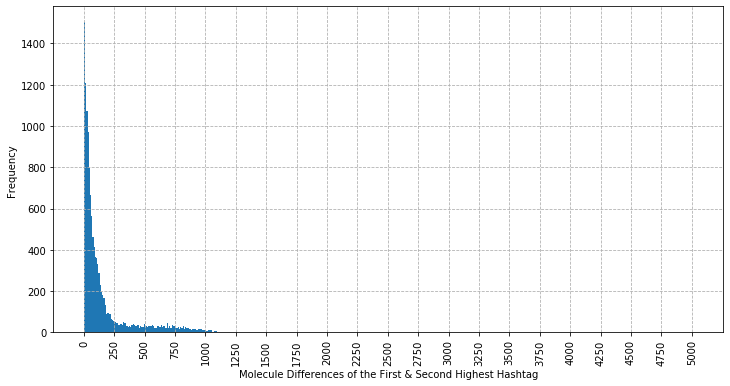

In [73]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(
    results, bins=500
)
ax.set_xlabel("Molecule Differences of the First & Second Highest Hashtag")
ax.set_ylabel("Frequency")
ax.set_xticks(np.arange(np.max(results), step=250))
ax.tick_params(axis="x", rotation=90)
ax.grid(b=True, linestyle="--")
plt.show()

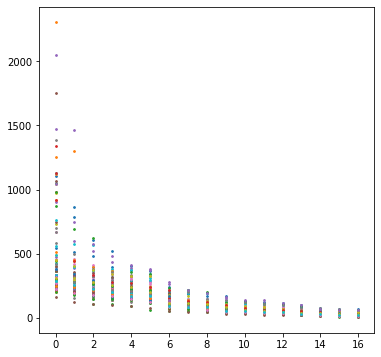

In [74]:
fig, ax = plt.subplots(figsize=(6,6))

for umis in sorted_doublets.head(100):
    ax.scatter(
        x=range(len(df_umis.columns)),
        y=umis,
        s=3
    )

plt.show()

# Only PBMC

In [75]:
df_pbmc = pd.read_pickle("./data/1823_PDX_3_1_HTO/67c7c4db-b739-44d9-94f1-7d4c7ccb0b2b/PBMC_hashtags.pickle")

In [76]:
df_pbmc

,M0001,M0002,M0003,M0004,M0005,M0006,M0007,M0011,M0012,M0013,M0014,M0015,M0016,M0017,M0018,M0019,M0020,unmapped,hashID
1823_PDX_3_1_IGO_10837_15_121336944016309,18,60,21,159,26,70,139,23,22,239,153,24,138,39,139,51,616,31,Doublet
1823_PDX_3_1_IGO_10837_15_121336946387876,17,58,26,115,22,74,124,15,45,92,176,20,171,29,87,30,1060,63,M0020
1823_PDX_3_1_IGO_10837_15_121347517900523,43,130,49,260,70,146,287,60,63,366,599,33,258,66,268,89,663,81,Doublet
1823_PDX_3_1_IGO_10837_15_121416136386870,28,41,33,132,30,110,174,18,32,147,213,17,153,49,139,42,1036,66,M0020
1823_PDX_3_1_IGO_10837_15_121749143210868,28,59,37,155,42,110,173,21,43,169,236,13,218,45,147,56,641,41,Doublet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823_PDX_3_1_IGO_10837_15_240488852146022,28,93,45,268,46,121,291,23,88,254,311,28,218,54,219,57,1096,72,Doublet
1823_PDX_3_1_IGO_10837_15_240488853399862,80,184,88,527,78,247,634,58,104,440,537,67,421,113,365,157,3558,110,M0020
1823_PDX_3_1_IGO_10837_15_240488854207219,31,128,47,342,79,137,288,39,77,274,379,37,304,76,298,85,684,59,Doublet
1823_PDX_3_1_IGO_10837_15_240488856272283,48,140,44,389,94,165,284,56,84,447,633,54,291,89,229,86,759,87,Doublet


In [77]:
df_pbmc.describe()

,M0001,M0002,M0003,M0004,M0005,M0006,M0007,M0011,M0012,M0013,M0014,M0015,M0016,M0017,M0018,M0019,M0020,unmapped
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,30.163717,94.988938,43.820796,228.462389,55.320796,115.165929,252.984513,34.329646,61.265487,227.575221,324.506637,31.495575,248.674779,64.457965,188.648230,62.230088,865.761062,59.258850
std,13.180302,35.794218,23.412832,105.647076,38.803630,40.354432,106.677778,50.718341,41.067900,91.241553,134.142716,30.727000,100.218400,25.610861,74.332433,25.889500,382.667572,22.039006
min,6.000000,11.000000,4.000000,38.000000,5.000000,17.000000,40.000000,1.000000,6.000000,34.000000,48.000000,8.000000,44.000000,6.000000,32.000000,9.000000,239.000000,10.000000
25%,21.000000,73.000000,32.000000,168.000000,38.750000,89.750000,185.000000,23.000000,46.000000,169.750000,241.000000,21.000000,188.750000,49.000000,144.000000,46.000000,663.750000,45.000000
50%,27.000000,86.000000,39.000000,202.000000,47.000000,107.000000,229.000000,29.000000,53.000000,211.000000,293.000000,27.000000,226.500000,58.000000,169.500000,57.000000,793.000000,54.000000
75%,35.000000,106.000000,49.250000,250.250000,61.000000,129.000000,286.000000,37.000000,65.000000,253.000000,364.250000,34.000000,283.000000,73.000000,211.250000,69.000000,980.000000,68.000000
max,91.000000,243.000000,267.000000,879.000000,573.000000,278.000000,906.000000,1069.000000,745.000000,759.000000,939.000000,596.000000,817.000000,181.000000,551.000000,200.000000,4318.000000,170.000000


In [87]:
df_pbmc.iloc[:,:-2]

,M0001,M0002,M0003,M0004,M0005,M0006,M0007,M0011,M0012,M0013,M0014,M0015,M0016,M0017,M0018,M0019,M0020
1823_PDX_3_1_IGO_10837_15_121336944016309,18,60,21,159,26,70,139,23,22,239,153,24,138,39,139,51,616
1823_PDX_3_1_IGO_10837_15_121336946387876,17,58,26,115,22,74,124,15,45,92,176,20,171,29,87,30,1060
1823_PDX_3_1_IGO_10837_15_121347517900523,43,130,49,260,70,146,287,60,63,366,599,33,258,66,268,89,663
1823_PDX_3_1_IGO_10837_15_121416136386870,28,41,33,132,30,110,174,18,32,147,213,17,153,49,139,42,1036
1823_PDX_3_1_IGO_10837_15_121749143210868,28,59,37,155,42,110,173,21,43,169,236,13,218,45,147,56,641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823_PDX_3_1_IGO_10837_15_240488852146022,28,93,45,268,46,121,291,23,88,254,311,28,218,54,219,57,1096
1823_PDX_3_1_IGO_10837_15_240488853399862,80,184,88,527,78,247,634,58,104,440,537,67,421,113,365,157,3558
1823_PDX_3_1_IGO_10837_15_240488854207219,31,128,47,342,79,137,288,39,77,274,379,37,304,76,298,85,684
1823_PDX_3_1_IGO_10837_15_240488856272283,48,140,44,389,94,165,284,56,84,447,633,54,291,89,229,86,759


In [102]:
tag_median = df_pbmc.iloc[:,:-2].apply(lambda x: np.median(x))
tag_median

M0001     27.0
M0002     86.0
M0003     39.0
M0004    202.0
M0005     47.0
M0006    107.0
M0007    229.0
M0011     29.0
M0012     53.0
M0013    211.0
M0014    293.0
M0015     27.0
M0016    226.5
M0017     58.0
M0018    169.5
M0019     57.0
M0020    793.0
dtype: float64

In [116]:
tag_keep = set(tag_median[ tag_median < 200 ].index)
tag_keep

{'M0001',
 'M0002',
 'M0003',
 'M0005',
 'M0006',
 'M0011',
 'M0012',
 'M0015',
 'M0017',
 'M0018',
 'M0019'}

In [120]:
tag_keep.add("M0020")

In [121]:
tag_keep

{'M0001',
 'M0002',
 'M0003',
 'M0005',
 'M0006',
 'M0011',
 'M0012',
 'M0015',
 'M0017',
 'M0018',
 'M0019',
 'M0020'}

In [126]:
df_pbmc_filtered = df_pbmc.loc[:,sorted(tag_keep)]
df_pbmc_filtered

,M0001,M0002,M0003,M0005,M0006,M0011,M0012,M0015,M0017,M0018,M0019,M0020
1823_PDX_3_1_IGO_10837_15_121336944016309,18,60,21,26,70,23,22,24,39,139,51,616
1823_PDX_3_1_IGO_10837_15_121336946387876,17,58,26,22,74,15,45,20,29,87,30,1060
1823_PDX_3_1_IGO_10837_15_121347517900523,43,130,49,70,146,60,63,33,66,268,89,663
1823_PDX_3_1_IGO_10837_15_121416136386870,28,41,33,30,110,18,32,17,49,139,42,1036
1823_PDX_3_1_IGO_10837_15_121749143210868,28,59,37,42,110,21,43,13,45,147,56,641
...,...,...,...,...,...,...,...,...,...,...,...,...
1823_PDX_3_1_IGO_10837_15_240488852146022,28,93,45,46,121,23,88,28,54,219,57,1096
1823_PDX_3_1_IGO_10837_15_240488853399862,80,184,88,78,247,58,104,67,113,365,157,3558
1823_PDX_3_1_IGO_10837_15_240488854207219,31,128,47,79,137,39,77,37,76,298,85,684
1823_PDX_3_1_IGO_10837_15_240488856272283,48,140,44,94,165,56,84,54,89,229,86,759


In [127]:
df_clr2 = df_pbmc_filtered.apply(lambda row: np.log1p((row + 1) / scipy.stats.mstats.gmean(row + 1)), axis=1)
df_clr2.sample(10)

,M0001,M0002,M0003,M0005,M0006,M0011,M0012,M0015,M0017,M0018,M0019,M0020
1823_PDX_3_1_IGO_10837_15_226941468294557,0.303196,0.757705,0.421460,0.493185,1.059260,0.421460,0.599768,0.303196,0.607515,1.238641,0.568166,2.864898
1823_PDX_3_1_IGO_10837_15_129990112439131,0.433685,0.722084,0.406939,0.509881,0.935057,0.388703,0.617949,0.370128,0.595754,1.263621,0.617949,2.439301
1823_PDX_3_1_IGO_10837_15_134599417129822,0.412761,0.907334,0.491812,0.508561,0.873319,0.286268,0.549247,0.474777,0.611086,1.191653,0.508561,2.560784
1823_PDX_3_1_IGO_10837_15_236161539729827,0.356596,0.901246,0.544617,0.436094,0.930801,0.270228,0.594759,0.335693,0.702818,1.208702,0.717344,2.432422
1823_PDX_3_1_IGO_10837_15_239396736391070,0.332636,0.830097,0.422772,0.408302,0.972419,0.300690,0.557001,0.422772,0.569484,1.476218,0.544361,2.912786
1823_PDX_3_1_IGO_10837_15_134051765110627,0.393077,0.856721,0.393077,0.656170,0.879182,0.368707,0.637490,0.331000,0.599050,1.215504,0.656170,2.266932
1823_PDX_3_1_IGO_10837_15_169778423183283,0.354715,0.949974,0.395080,0.591947,0.966866,0.333905,0.558916,0.312653,0.489390,1.442206,0.677528,2.467352
1823_PDX_3_1_IGO_10837_15_126279344577779,0.374941,0.756296,0.474083,0.507830,0.928273,0.384371,0.507830,0.336305,0.602731,1.215216,0.572087,2.883283
1823_PDX_3_1_IGO_10837_15_239517939186924,0.295564,0.893765,0.427240,0.533544,0.941832,0.381339,0.620421,0.438394,0.513168,1.366862,0.573091,2.423222
1823_PDX_3_1_IGO_10837_15_230739173292781,0.316788,0.809941,0.396186,0.593461,1.046391,0.407031,0.650018,0.385222,0.679196,1.159286,0.624312,2.129865


In [128]:
%%time
df_kmeans2 = df_clr2.apply(lambda row: kemans_per_row(row) , axis=1)

CPU times: user 5.01 s, sys: 22 ms, total: 5.03 s
Wall time: 5.03 s


In [129]:
df_kmeans2

1823_PDX_3_1_IGO_10837_15_121336944016309    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1823_PDX_3_1_IGO_10837_15_121336946387876    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1823_PDX_3_1_IGO_10837_15_121347517900523    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
1823_PDX_3_1_IGO_10837_15_121416136386870    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1823_PDX_3_1_IGO_10837_15_121749143210868    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
                                                             ...                 
1823_PDX_3_1_IGO_10837_15_240488852146022    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1823_PDX_3_1_IGO_10837_15_240488853399862    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1823_PDX_3_1_IGO_10837_15_240488854207219    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
1823_PDX_3_1_IGO_10837_15_240488856272283    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
1823_PDX_3_1_IGO_10837_15_240549788274022    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Length: 452, dtype: object

In [137]:
df_hotencoded = df_kmeans2.apply(
        lambda x: "".join(str(y) for y in x)).to_frame()

In [138]:
df_hotencoded

,0
1823_PDX_3_1_IGO_10837_15_121336944016309,000000000001
1823_PDX_3_1_IGO_10837_15_121336946387876,000000000001
1823_PDX_3_1_IGO_10837_15_121347517900523,000000000101
1823_PDX_3_1_IGO_10837_15_121416136386870,000000000001
1823_PDX_3_1_IGO_10837_15_121749143210868,000000000001
...,...
1823_PDX_3_1_IGO_10837_15_240488852146022,000000000001
1823_PDX_3_1_IGO_10837_15_240488853399862,000000000001
1823_PDX_3_1_IGO_10837_15_240488854207219,000000000101
1823_PDX_3_1_IGO_10837_15_240488856272283,000000000001


In [139]:
hto_names = list(map(lambda name: name.split(
        "-")[0].replace("_", "-"), df_clr2.columns))

In [140]:
hto_names

['M0001',
 'M0002',
 'M0003',
 'M0005',
 'M0006',
 'M0011',
 'M0012',
 'M0015',
 'M0017',
 'M0018',
 'M0019',
 'M0020']

In [151]:
def demux_pass2(cb):

    # index of hto having the largest UMIs: 0, 1, 2, or 3
    idmax = ss_umi_largest[cb]

    # which group belongs to? 0 or 1
    group_id = df_hotencoded.loc[cb][0][idmax]

    # how many hto belong that group?
    num_htos = df_hotencoded.loc[cb][0].count(group_id)

    # if greater than or equal to two HTOs belong to that group, it means doublet
    # return "Doublet" if doublet, return HTO ID if singlet
    # return "Doublet" if num_htos >= 2 else "Singlet"
    return "Doublet" if num_htos >= 2 else hto_names[idmax]

In [152]:
df_hotencoded

,0
1823_PDX_3_1_IGO_10837_15_121336944016309,000000000001
1823_PDX_3_1_IGO_10837_15_121336946387876,000000000001
1823_PDX_3_1_IGO_10837_15_121347517900523,000000000101
1823_PDX_3_1_IGO_10837_15_121416136386870,000000000001
1823_PDX_3_1_IGO_10837_15_121749143210868,000000000001
...,...
1823_PDX_3_1_IGO_10837_15_240488852146022,000000000001
1823_PDX_3_1_IGO_10837_15_240488853399862,000000000001
1823_PDX_3_1_IGO_10837_15_240488854207219,000000000101
1823_PDX_3_1_IGO_10837_15_240488856272283,000000000001


In [156]:
df_pbmc_filtered

,M0001,M0002,M0003,M0005,M0006,M0011,M0012,M0015,M0017,M0018,M0019,M0020
1823_PDX_3_1_IGO_10837_15_121336944016309,18,60,21,26,70,23,22,24,39,139,51,616
1823_PDX_3_1_IGO_10837_15_121336946387876,17,58,26,22,74,15,45,20,29,87,30,1060
1823_PDX_3_1_IGO_10837_15_121347517900523,43,130,49,70,146,60,63,33,66,268,89,663
1823_PDX_3_1_IGO_10837_15_121416136386870,28,41,33,30,110,18,32,17,49,139,42,1036
1823_PDX_3_1_IGO_10837_15_121749143210868,28,59,37,42,110,21,43,13,45,147,56,641
...,...,...,...,...,...,...,...,...,...,...,...,...
1823_PDX_3_1_IGO_10837_15_240488852146022,28,93,45,46,121,23,88,28,54,219,57,1096
1823_PDX_3_1_IGO_10837_15_240488853399862,80,184,88,78,247,58,104,67,113,365,157,3558
1823_PDX_3_1_IGO_10837_15_240488854207219,31,128,47,79,137,39,77,37,76,298,85,684
1823_PDX_3_1_IGO_10837_15_240488856272283,48,140,44,94,165,56,84,54,89,229,86,759


In [160]:
df_tmp = df_pbmc_filtered.copy()

In [161]:
df_tmp.columns = range(0, len(df_tmp.columns))

In [162]:
df_tmp.idxmax(axis=1)

1823_PDX_3_1_IGO_10837_15_121336944016309    11
1823_PDX_3_1_IGO_10837_15_121336946387876    11
1823_PDX_3_1_IGO_10837_15_121347517900523    11
1823_PDX_3_1_IGO_10837_15_121416136386870    11
1823_PDX_3_1_IGO_10837_15_121749143210868    11
                                             ..
1823_PDX_3_1_IGO_10837_15_240488852146022    11
1823_PDX_3_1_IGO_10837_15_240488853399862    11
1823_PDX_3_1_IGO_10837_15_240488854207219    11
1823_PDX_3_1_IGO_10837_15_240488856272283    11
1823_PDX_3_1_IGO_10837_15_240549788274022    11
Length: 452, dtype: int64

In [163]:
ss_umi_largest = df_tmp.idxmax(axis=1)

In [164]:
df_class = pd.DataFrame(
    list(map(lambda cb: (cb, demux_pass2(cb)), df_hotencoded.index))
)
df_class.columns = ["CB", "hashID"]
df_class.set_index("CB", inplace=True)
df_class

,hashID
CB,
1823_PDX_3_1_IGO_10837_15_121336944016309,M0020
1823_PDX_3_1_IGO_10837_15_121336946387876,M0020
1823_PDX_3_1_IGO_10837_15_121347517900523,Doublet
1823_PDX_3_1_IGO_10837_15_121416136386870,M0020
1823_PDX_3_1_IGO_10837_15_121749143210868,M0020
...,...
1823_PDX_3_1_IGO_10837_15_240488852146022,M0020
1823_PDX_3_1_IGO_10837_15_240488853399862,M0020
1823_PDX_3_1_IGO_10837_15_240488854207219,Doublet


In [165]:
df_class.groupby("hashID").size()

hashID
Doublet     93
M0020      359
dtype: int64